In [3]:
###########import packages##########
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
import lightgbm
import catboost
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import ensemble
from sklearn.tree import ExtraTreeRegressor
from sklearn import svm
from sklearn import neighbors
from sklearn import tree
%matplotlib inline
###########wrapping root mean square error for later calls##########
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
###########loading data##########
fdata=pd.read_csv('database.csv',encoding="gbk")
raw_data=fdata.loc[:,[                     
                      'A_c',#0
                      'A_a',#1
                      'L_cl',#2
                      'i0',#3
                      'L-PEM',#4
                      'L_GDL',#5
                      'epsl_cl',#6
                      'epsp_cl',#7
                      'T_cc',#8
                      'RH_cc',#9
                      'pressure',#10
                      'Volt0.7'#
                        ]]
###########train test splitting##########
standardized_data = (raw_data-np.mean(raw_data,axis=0))/np.std(raw_data,axis=0)
raw_input=raw_data.iloc[:,0:11]
raw_output=raw_data.iloc[:,11]
###########fix random seed for reproducability##########
seed=1
X_train, X_test, y_train, y_test = train_test_split(raw_input, raw_output, test_size=.15,random_state=seed)
y_test_values=y_test.values.astype(np.float32)

########################################################
########################################################
#############Machine Learning Algorithms################
########################################################
########################################################
def gridsearch(model,param,algorithm_name):
    print('start')
    grid = GridSearchCV(model,param_grid=param,cv=5)
    grid.fit(X_train,y_train)
    print('Best Regressor:',grid.best_params_,'Best Score:', grid.best_score_)
    best_model=grid.best_estimator_
    result = best_model.predict(X_test)
    x_prediction_07=result
    y_real_07=y_test_values
    x_prediction_07_series=pd.Series(x_prediction_07)
    y_real_07_series=pd.Series(y_real_07)
    ###########evaluating the regression quality##########
    corr_ann = round(x_prediction_07_series.corr(y_real_07_series), 5)
    rmse_val= rmse(x_prediction_07,y_real_07)
    print(rmse_val)
    print(corr_ann)
    ###########generating a figure##########
    x_y_x=np.arange(0,2.6,0.1)
    x_y_y=np.arange(0,2.6,0.1)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x_prediction_07,y_real_07,color='red',label=algorithm_name)
    ax.plot(x_y_x,x_y_y)
    plt.legend()
    plt.xlabel(u"Predicted_Current_0.7V A")
    plt.ylabel(u"Real_Current_0.7V A")
    plt.savefig('%s 0.7V.jpg' %algorithm_name)
    plt.show()
    name_list=[   'A_c',#0
                  'A_a',#1
                  'L_cl',#2
                  'i0',#3
                  'L-PEM',#4
                  'L_GDL',#5
                  'epsl_cl',#6
                  'epsp_cl',#7
                  'T_cc',#8
                  'RH_cc',#9
                  'pressure'  ]
    plt.bar(range(len(best_model.feature_importances_)), best_model.feature_importances_,color='rgb',tick_label=name_list)
    plt.xticks(rotation=90)
    plt.show()
    print(best_model.feature_importances_)
    print('finished')




start
Best Regressor: {'learning_rate': 0.2, 'reg_alpha': 0.01, 'reg_lambda': 0, 'subsample': 0.8} Best Score: 0.9953706914531043
0.027270066
0.99766


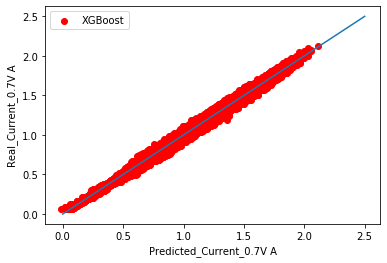

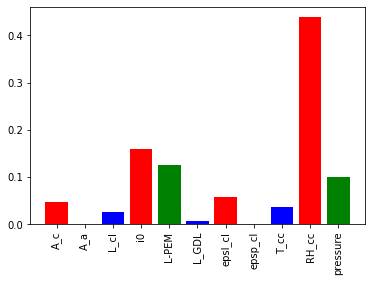

[0.04768738 0.00131634 0.02585551 0.15932538 0.12520702 0.00759103
 0.0575002  0.00086684 0.03557671 0.4387429  0.10033069]
finished
start
Best Regressor: {'learning_rate': 0.2, 'reg_alpha': 0, 'reg_lambda': 0.01, 'subsample': 0.5} Best Score: 0.9948422464116374
0.02904492410912187
0.99734


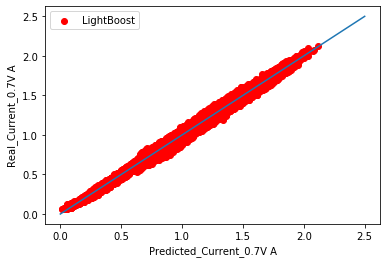

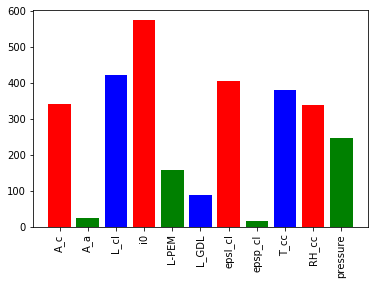

[341  25 422 575 160  88 405  18 380 339 247]
finished
start
Best Regressor: {'loss': 'ls', 'max_features': 'auto'} Best Score: 0.9727144197617628
0.06510886059374384
0.98708


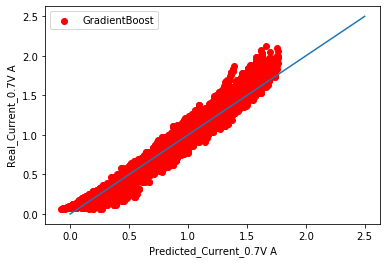

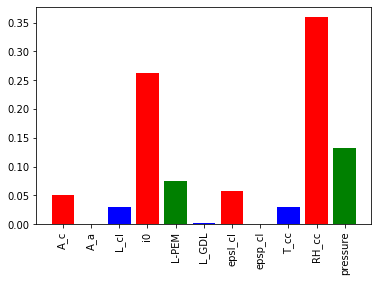

[4.99157403e-02 4.48245032e-05 3.03269062e-02 2.62868461e-01
 7.57816393e-02 1.97052886e-03 5.69526227e-02 9.04435516e-04
 2.98551298e-02 3.59550931e-01 1.31828781e-01]
finished
start
Best Regressor: {'max_features': 'auto'} Best Score: 0.9935094929322863
0.03379259850981303
0.9964


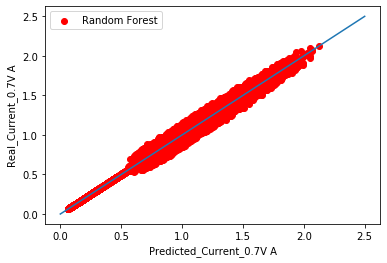

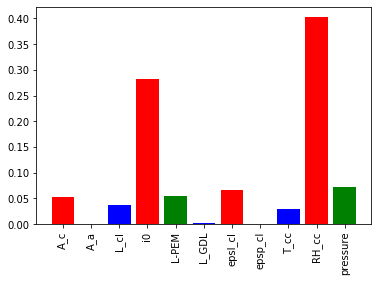

[0.05236513 0.00050104 0.03681637 0.28287189 0.05419442 0.00248647
 0.0662779  0.00110436 0.02955106 0.40247853 0.07135282]
finished
start
Best Regressor: {'criterion': 'friedman_mse', 'splitter': 'best'} Best Score: 0.9904012666545763
0.04098754138464334
0.99471


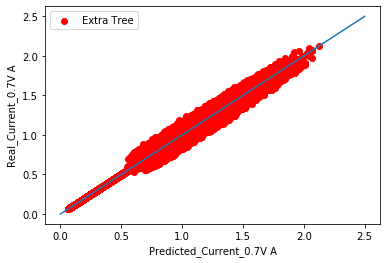

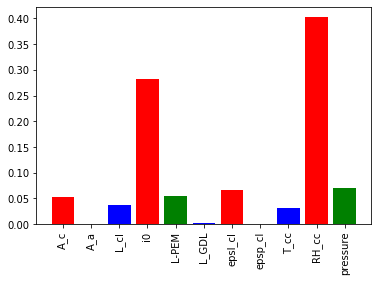

[5.26800216e-02 3.17062110e-04 3.69904731e-02 2.82869403e-01
 5.43925740e-02 2.26739345e-03 6.63639636e-02 2.96920192e-04
 3.07254285e-02 4.02706160e-01 7.03906008e-02]
finished
start
Best Regressor: {'criterion': 'friedman_mse', 'max_features': 'auto', 'splitter': 'best'} Best Score: 0.9904012666545763
0.04098754138464334
0.99471


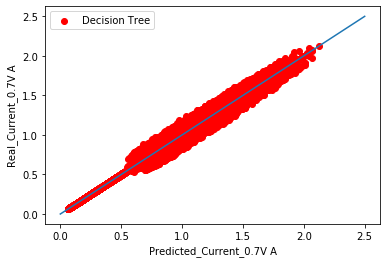

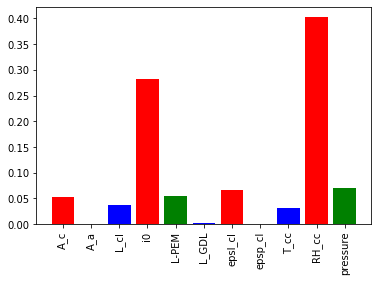

[5.26800216e-02 3.17062110e-04 3.69904731e-02 2.82869403e-01
 5.43925740e-02 2.26739345e-03 6.63639636e-02 2.96920192e-04
 3.07254285e-02 4.02706160e-01 7.03906008e-02]
finished
start
Best Regressor: {'learning_rate': 0.2, 'loss': 'square'} Best Score: 0.8366015815860223
0.16541606166872247
0.9236


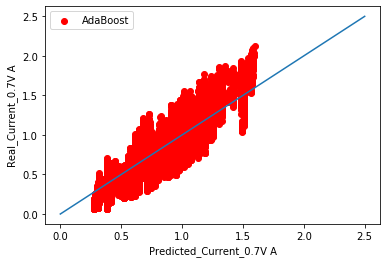

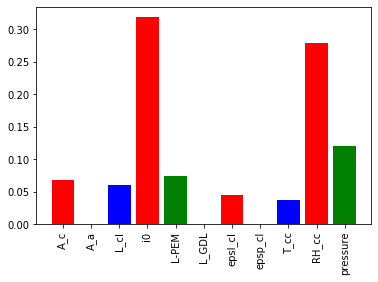

[0.06766402 0.         0.06017133 0.31848601 0.07432403 0.
 0.04423988 0.         0.0371031  0.27797378 0.12003786]
finished


In [4]:
###########XGBoost gridsearch CV for best hyperparameter##########
model_XGBRegressor = xgb.XGBRegressor(random_state=seed)
###########defining the parameters dictionary##########
param_xgb = {
    'learning_rate':[0.01,0.02,0.05,0.1,0.2,1],
    'subsample':[0.5,0.6,0.7,0.8,0.9,1],
    'reg_lambda':[0.1,0.01,0],
    'reg_alpha':[0.1,0.01,0]
}
gridsearch(model_XGBRegressor,param_xgb,'XGBoost')

###########LGBM gridsearch CV for best hyperparameter##########
model_lgbmRegressor = lightgbm.LGBMRegressor(random_state=seed)
###########defining the parameters dictionary##########
param_lgbm = {
            'learning_rate':[0.01,0.02,0.05,0.1,0.2,1],
    'subsample':[0.5,0.6,0.7,0.8,0.9,1],
    'reg_lambda':[0.1,0.01,0],
    'reg_alpha':[0.1,0.01,0]
}
gridsearch(model_lgbmRegressor,param_lgbm,'LightBoost')

###########GradientBoost gridsearch CV for best hyperparameter##########
model_GradientBoostingRegressor = ensemble.GradientBoostingRegressor(random_state=seed)
###########defining the parameters dictionary##########
param_GB = {
         'max_features':['auto','sqrt','log2'],
         'loss':['ls', 'lad', 'huber', 'quantile']
}
gridsearch(model_GradientBoostingRegressor,param_GB,'GradientBoost')

###########RandomForest gridsearch CV for best hyperparameter##########
model_RandomForestRegressor = ensemble.RandomForestRegressor(random_state=seed)
###########defining the parameters dictionary##########
param_RF = {
    'max_features':['auto','sqrt','log2']
}
gridsearch(model_RandomForestRegressor,param_RF,'Random Forest')


###########Extra Tree gridsearch CV for best hyperparameter##########
model_ExtraTreeRegressor = ExtraTreeRegressor(random_state=seed)
param_ET = {
       'criterion' : ["mse", "friedman_mse", "mae"],
       'splitter' : [ "best",'random']
}
gridsearch(model_ExtraTreeRegressor,param_ET,'Extra Tree')


###########Decision Tree gridsearch CV for best hyperparameter##########
model_DecisionTreeRegressor = tree.DecisionTreeRegressor(random_state=seed)
param_DT = {
         'criterion':['mse','mae','friedman_mse'],
         'splitter':['random','best'],
         'max_features':["auto", "sqrt", "log2"]
}
gridsearch(model_DecisionTreeRegressor,param_DT,'Decision Tree')


###########AdaBoost gridsearch CV for best hyperparameter##########
model_AdaBoostRegressor = ensemble.AdaBoostRegressor(random_state=seed)
param_Ada = {
    'learning_rate':[0.01,0.02,0.05,0.1,0.2,1],
    'loss':['linear', 'square', 'exponential']
}
gridsearch(model_AdaBoostRegressor,param_Ada,'AdaBoost')


start
Best Regressor: {'iterations': 400} Best Score: 0.9967499522297685
0.022563307248675907
0.9984


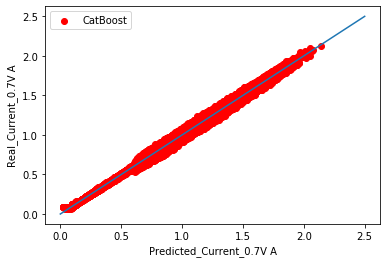

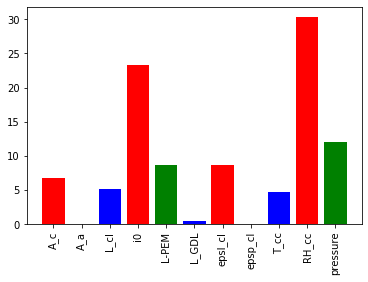

[6.82947152e+00 3.70354679e-02 5.11979607e+00 2.32382628e+01
 8.67397403e+00 4.72239077e-01 8.65752701e+00 1.41872340e-02
 4.65864034e+00 3.03234581e+01 1.19754084e+01]
finished


In [5]:
###########CatBoost gridsearch CV for best hyperparameter##########
model_CatboostRegressor=catboost.CatBoostRegressor(random_state=1,verbose=0)
param_cat = {'iterations':[50,100,200,400]
}
gridsearch(model_CatboostRegressor,param_cat,'CatBoost')